In [1]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor

# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor

#importing the metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#importing the K fold
from sklearn.model_selection import KFold

#importing the cross validation score
from sklearn.model_selection import cross_val_score

#importing the feature scaling library
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Importing OS and SYS library
import os,sys
from scipy import stats
import itertools 

# IQR Library
from scipy.stats import iqr 

# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
master = pd.read_csv('concrete.csv', sep = ',', engine = 'python')
master.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Deliverable – 1 (Exploratory Data Analysis)

### 1.1 Univariate Analysis

In [3]:
# Let's understand the type of values in each column of our dataframe 'master'.
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# Check the shape of dataframe master
master.shape

(1030, 9)

In [5]:
# Looking at all the column names
master.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [6]:
# lets check the unique value in each column

for col in list(master):
    print(col)
    print(master[col].unique())

cement
[141.3 168.9 250.  266.  154.8 255.  166.8 251.4 296.  155.  151.8 173.
 385.  237.5 167.  213.8 336.  190.7 312.7 229.7 228.  236.  132.  331.
 310.  304.  425.  166.1 339.  475.  145.7 313.  178.  165.  277.2 325.
 194.7 246.8 382.  149.  531.3 387.  193.5 326.  337.9 200.  218.9 234.
 309.9 350.  182.  480.  295.7 233.8 379.5 332.5 237.  238.1 323.7 342.
 388.6 147.8 290.4 500.  284.  218.2 190.3 116.  277.  376.  273.  212.5
 362.6 275.1 139.6 427.5 183.9 318.8 252.  149.5 540.  380.  436.  281.
 151.6 326.5 397.  238.  158.6 302.  192.  155.6 160.  222.4 251.8 213.5
 446.  133.  122.6 290.2 375.  181.4 298.2 162.  262.  213.7 313.3 322.
 173.5 299.8 198.6 286.3 349.  520.  252.1 255.5 172.4 212.1 276.  393.
 230.  389.9 157.  359.  374.  102.  202.  252.3 336.5 315.  159.  231.8
 159.8 164.6 136.4 190.  184.  424.  212.  156.  136.  203.5 254.  220.8
 167.4 144.  108.3 214.9 469.  522.  250.2 439.  322.5 153.  525.  259.9
 236.9 366.  333.  145.9 277.1 166.  143.  181.9 450

In [7]:
# Number of unique in each column

for col in list(master):
    print(col, len(master[col].unique()))

cement 278
slag 185
ash 156
water 195
superplastic 111
coarseagg 284
fineagg 302
age 14
strength 845


In [8]:
# summarising number of missing values in each column
master.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### So there is no missing value

In [9]:
summary = master.describe().transpose()
summary['Diff'] = summary['mean'] - summary['50%']
summary['skew'] = master.skew()
summary

,count,mean,std,min,25%,50%,75%,max,Diff,skew
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,8.267864,0.509481
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,51.895825,0.800717
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,54.188350,0.537354
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,-3.432718,0.074628
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,-0.195340,0.907203
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,4.918932,-0.040220
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,-5.919515,-0.253010
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,17.662136,3.269177
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,1.372961,0.416977


Insights:

 - We will interpret the skewness number, using Bulmer (1979) — a classic — suggests this rule of thumb:
   - If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric
 - Water & ash seems to be doing ok in terms of skewness while Cement, Slag, Ash & Age has right skewed distribution as Mean > Median and seems to have lot of outlier

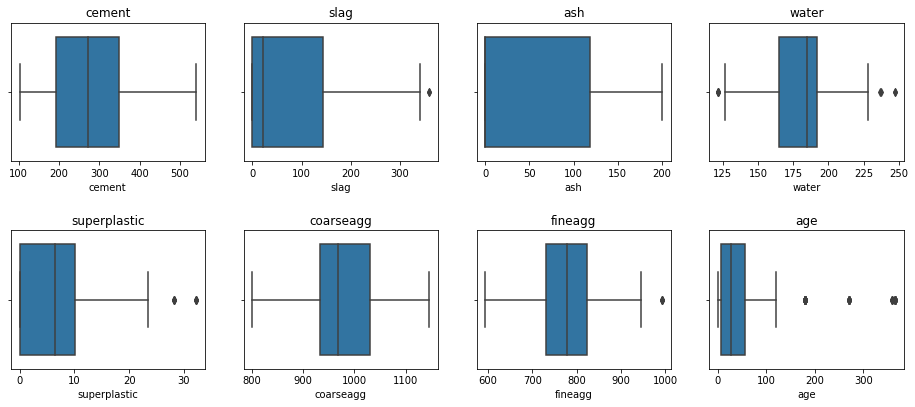

In [10]:
plt.figure(figsize=(16, 14))


# subplots

# subplot 1
plt.subplot(4, 4, 1)
plt.title('cement')
sns.boxplot(master['cement'])

# subplot 2
plt.subplot(4, 4, 2)
plt.title('slag')
sns.boxplot(master['slag'])

# subplot 3
plt.subplot(4, 4, 3)
plt.title('ash')
sns.boxplot(master['ash'])

# subplot 4
plt.subplot(4, 4, 4)
plt.title('water')
sns.boxplot(master['water'])

# subplot 5
plt.subplot(4, 4, 5)
plt.title('superplastic')
sns.boxplot(master['superplastic'])

# subplot 6
plt.subplot(4, 4, 6)
plt.title('coarseagg')
sns.boxplot(master['coarseagg'])

# subplot 7
plt.subplot(4, 4, 7)
plt.title('fineagg')
sns.boxplot(master['fineagg'])


# subplot 8
plt.subplot(4, 4, 8)
plt.title('age')
sns.boxplot(master['age'])


plt.subplots_adjust(hspace=0.5)

plt.show()

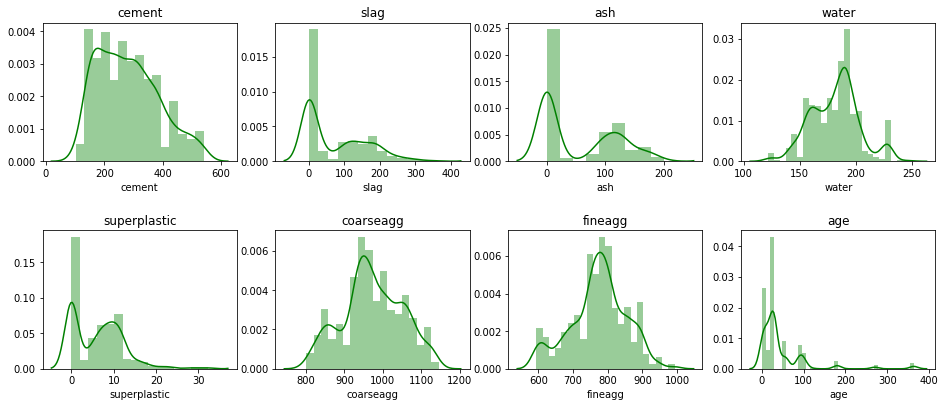

In [11]:
plt.figure(figsize=(16, 14))


# subplots

# subplot 1
plt.subplot(4, 4, 1)
plt.title('cement')
sns.distplot(master['cement'],color ='g')

# subplot 2
plt.subplot(4, 4, 2)
plt.title('slag')
sns.distplot(master['slag'],color ='g')

# subplot 3
plt.subplot(4, 4, 3)
plt.title('ash')
sns.distplot(master['ash'],color ='g')

# subplot 4
plt.subplot(4, 4, 4)
plt.title('water')
sns.distplot(master['water'],color ='g')

# subplot 5
plt.subplot(4, 4, 5)
plt.title('superplastic')
sns.distplot(master['superplastic'],color ='g')

# subplot 6
plt.subplot(4, 4, 6)
plt.title('coarseagg')
sns.distplot(master['coarseagg'],color ='g')

# subplot 7
plt.subplot(4, 4, 7)
plt.title('fineagg')
sns.distplot(master['fineagg'],color ='g')


# subplot 8
plt.subplot(4, 4, 8)
plt.title('age')
sns.distplot(master['age'],color ='g')


plt.subplots_adjust(hspace=0.5)

#plt.show()

### Observation

- cement is almost normal.
- slag has three gausssians and rightly skewed. It shows the presence of outlies.
- ash has two gaussians and rightly skewed.It shows the presence of outlies.
- water has three guassians and slighly left skewed. It shows the presence of outlies.
- superplastic has two gaussians and rightly skewed. It shows the presence of outlies.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed. It shows the presence of outlies.

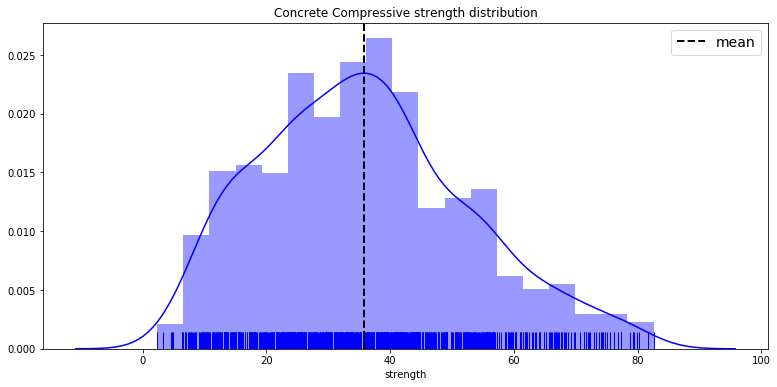

In [12]:
# Concrete compressive strength Distribution

plt.figure(figsize=(13,6))
sns.distplot(master["strength"],color="b",rug=True)
plt.axvline(master["strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Concrete Compressive strength distribution")
plt.show()

### Handling Outliers

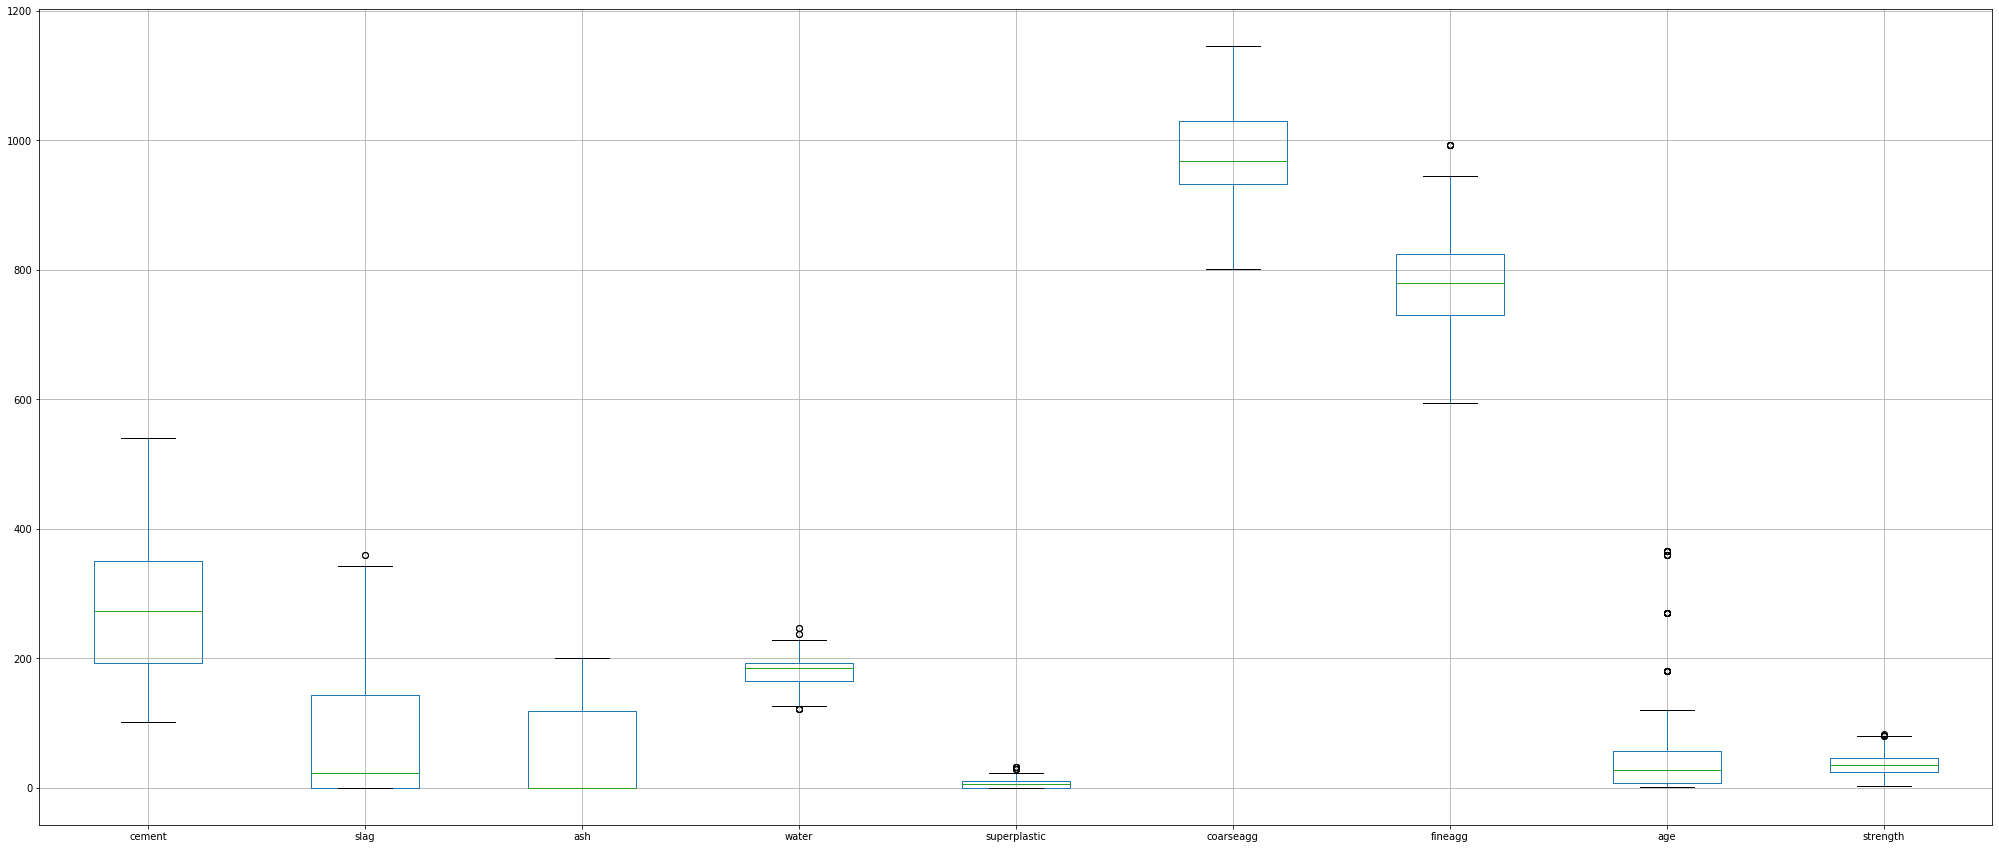

In [13]:
master_df=master.copy()
master_df.boxplot(figsize=(35,15))

- We can see that slag, water, superplastic,fineagg and age contain outliers.

### Outlier Treatment
- Find out the samples which are beyond the (IQR*1.5 + Q3) values.
- Replace all such values with the Median as Median is robust to the effect of Outlier.

In [14]:
# Function to find the Upper Cut-off & Median Value for the Given Variable

def outlier_cap(df):
    IQR = iqr(df)
    Q3 = np.percentile(df,75)
    ucap = IQR*1.5 + Q3
    median = df[df<ucap].median()
    return ucap,median

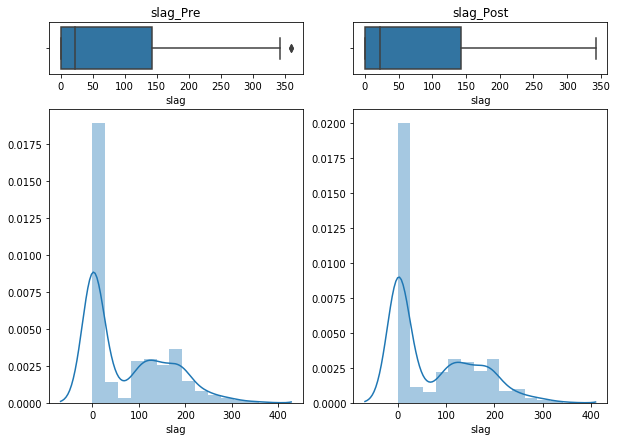

In [15]:
# Treating slag outlier

f,((ax_box,ax_box_post),(ax_hist,ax_hist_post)) = plt.subplots(2,2,gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(10,7))
sns.boxplot(master['slag'],ax=ax_box).set_title("slag_Pre")
sns.distplot(master['slag'],ax=ax_hist)
ucap_slag,median_slag = outlier_cap(master['slag'])
master.loc[master['slag']>ucap_slag,'slag'] = median_slag
sns.boxplot(master['slag'],ax=ax_box_post).set_title("slag_Post")
sns.distplot(master['slag'],ax=ax_hist_post)

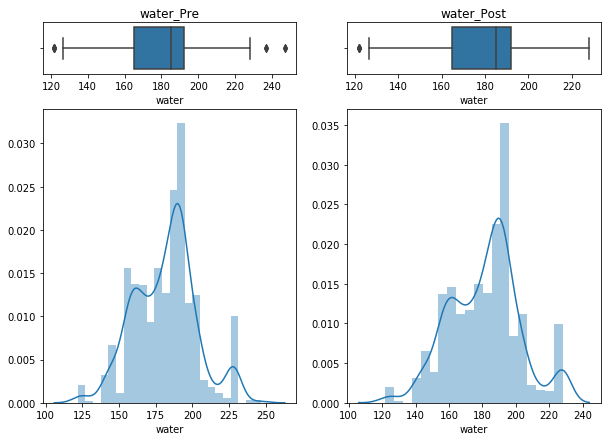

In [16]:
# Treating water outlier

f,((ax_box,ax_box_post),(ax_hist,ax_hist_post)) = plt.subplots(2,2,gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(10,7))
sns.boxplot(master['water'],ax=ax_box).set_title("water_Pre")
sns.distplot(master['water'],ax=ax_hist)
ucap_water,median_water = outlier_cap(master['water'])
master.loc[master['water']>ucap_water,'water'] = median_water
sns.boxplot(master['water'],ax=ax_box_post).set_title("water_Post")
sns.distplot(master['water'],ax=ax_hist_post)

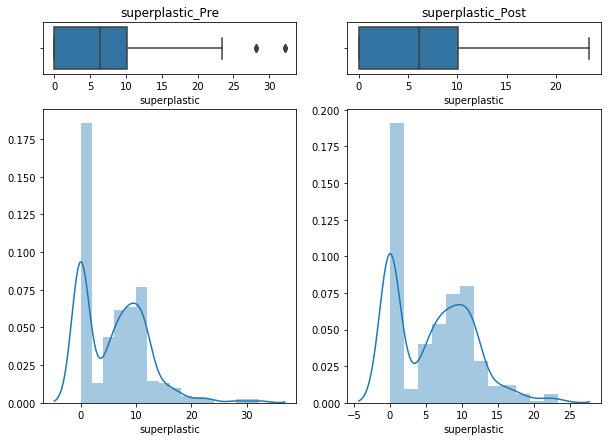

In [17]:
# Treating superplastic outlier

f,((ax_box,ax_box_post),(ax_hist,ax_hist_post)) = plt.subplots(2,2,gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(10,7))
sns.boxplot(master['superplastic'],ax=ax_box).set_title("superplastic_Pre")
sns.distplot(master['superplastic'],ax=ax_hist)
ucap_superplastic,median_superplastic = outlier_cap(master['superplastic'])
master.loc[master['superplastic']>ucap_superplastic,'superplastic'] = median_superplastic
sns.boxplot(master['superplastic'],ax=ax_box_post).set_title("superplastic_Post")
sns.distplot(master['superplastic'],ax=ax_hist_post)

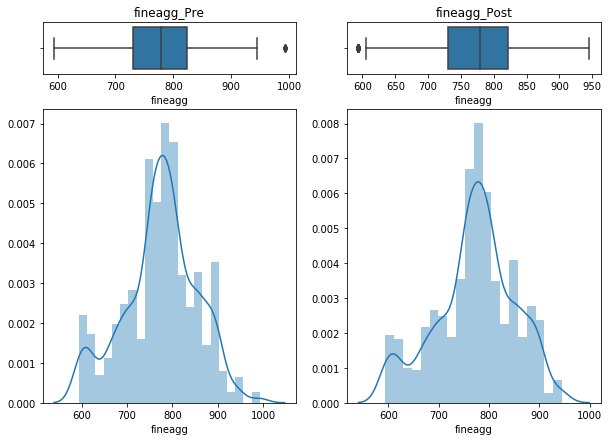

In [18]:
# Treating fineagg outlier

f,((ax_box,ax_box_post),(ax_hist,ax_hist_post)) = plt.subplots(2,2,gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(10,7))
sns.boxplot(master['fineagg'],ax=ax_box).set_title("fineagg_Pre")
sns.distplot(master['fineagg'],ax=ax_hist)
ucap_fineagg,median_fineagg = outlier_cap(master['fineagg'])
master.loc[master['fineagg']>ucap_fineagg,'fineagg'] = median_fineagg
sns.boxplot(master['fineagg'],ax=ax_box_post).set_title("fineagg_Post")
sns.distplot(master['fineagg'],ax=ax_hist_post)

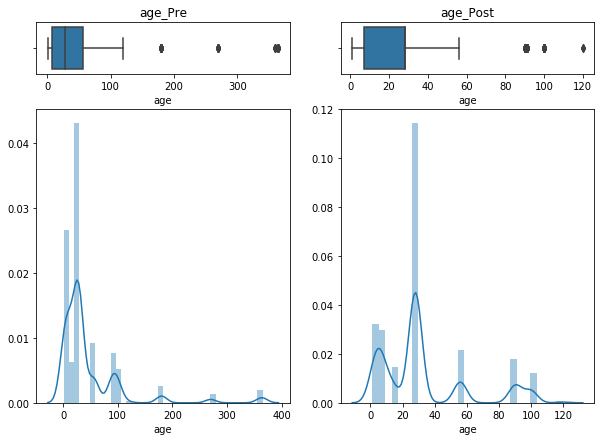

In [19]:
# Treating age outlier

f,((ax_box,ax_box_post),(ax_hist,ax_hist_post)) = plt.subplots(2,2,gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(10,7))
sns.boxplot(master['age'],ax=ax_box).set_title("age_Pre")
sns.distplot(master['age'],ax=ax_hist)
ucap_age,median_age = outlier_cap(master['age'])
master.loc[master['age']>ucap_age,'age'] = median_age
sns.boxplot(master['age'],ax=ax_box_post).set_title("age_Post")
sns.distplot(master['age'],ax=ax_hist_post)

### 1.2 Bivariate Analysis

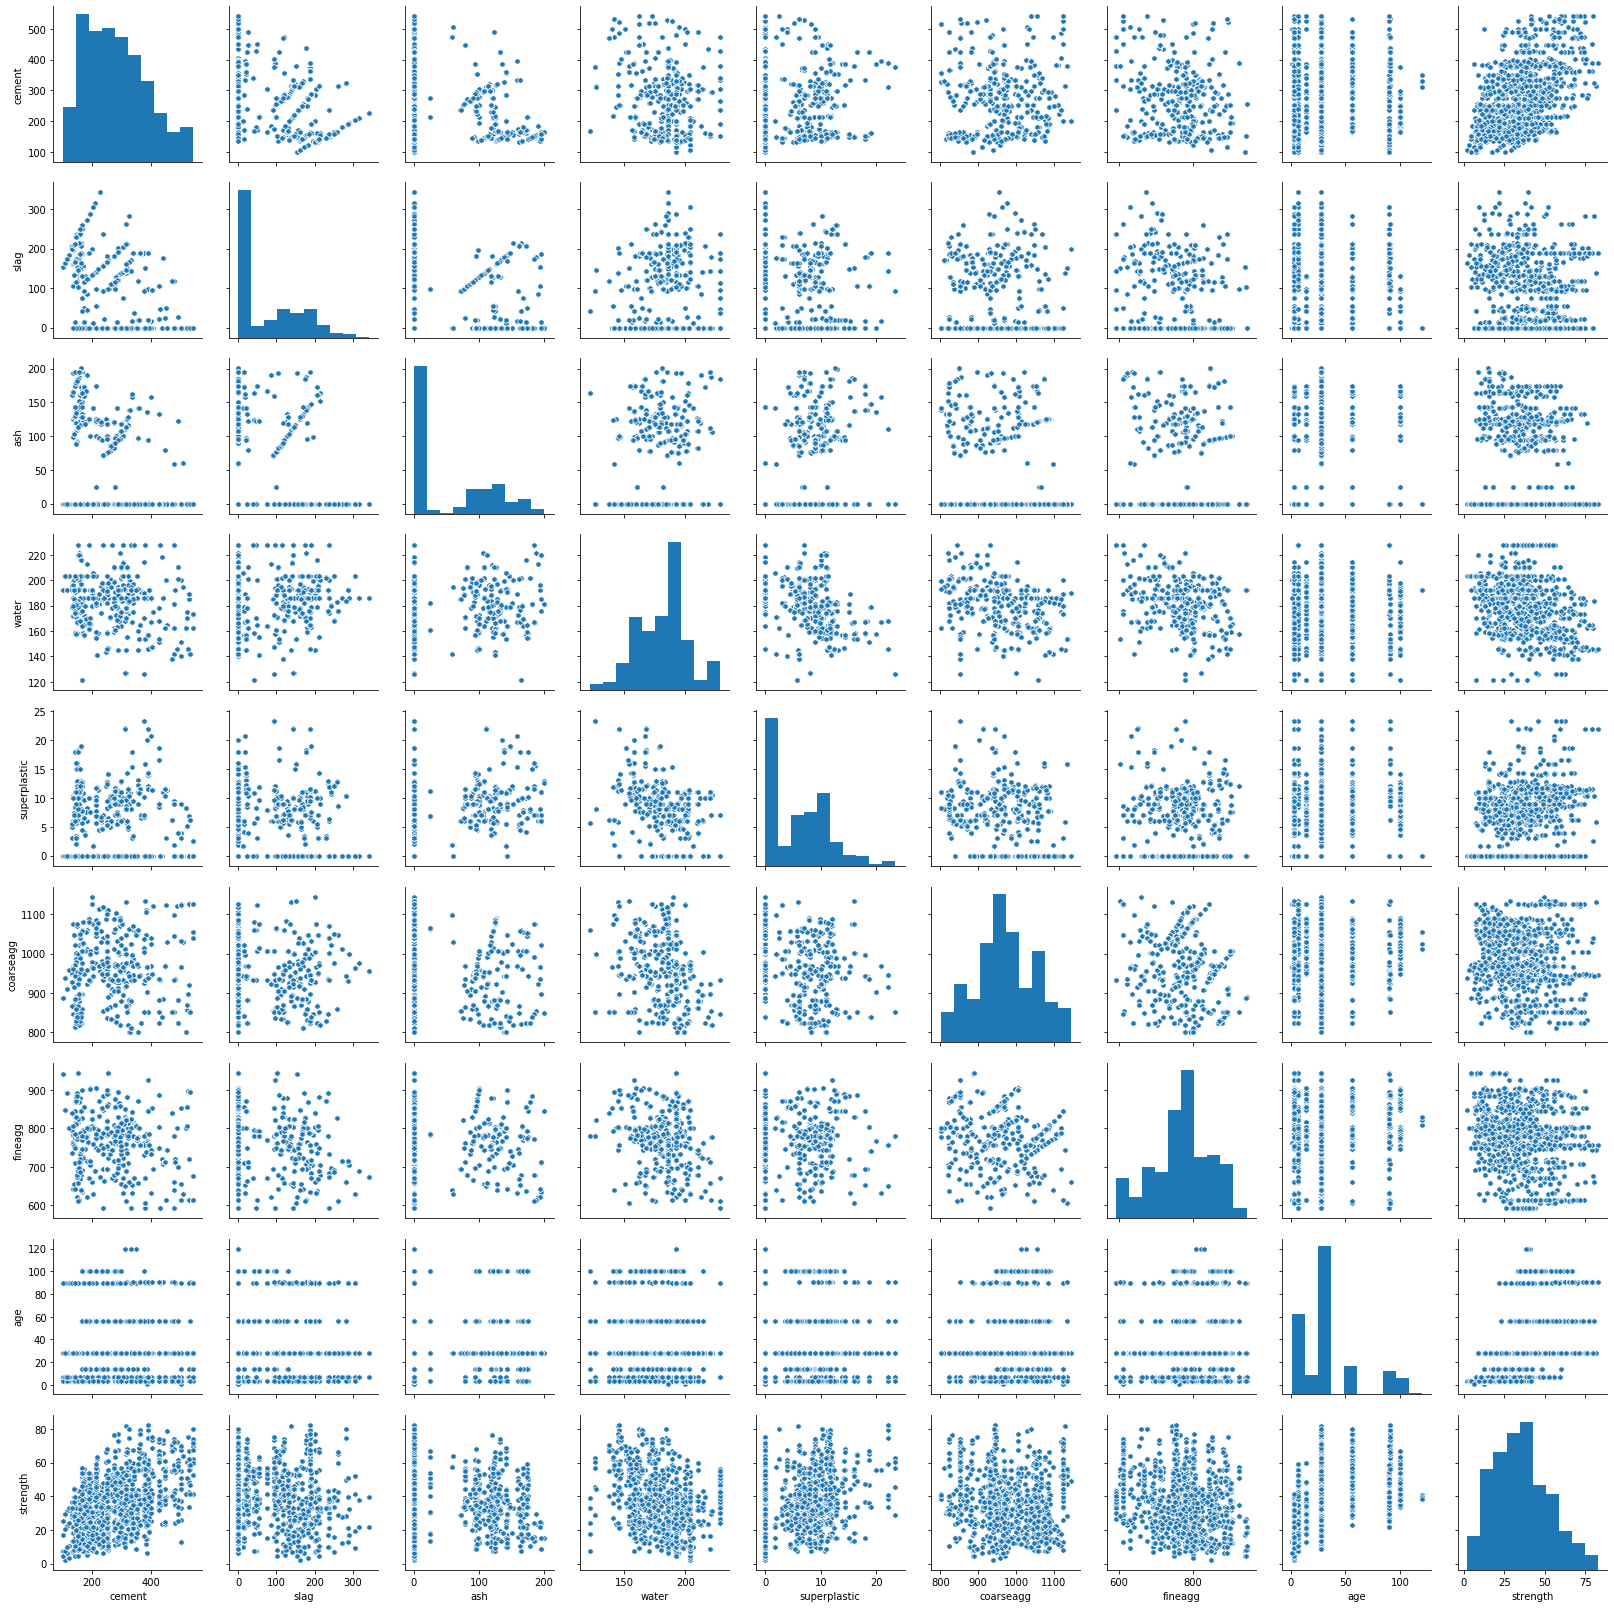

In [20]:
# Pairplot

sns.pairplot(master,markers="h")
plt.show()

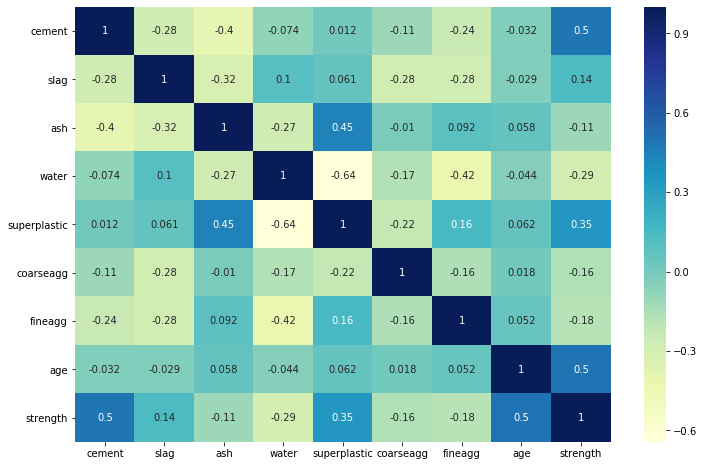

In [21]:
### Lets Check Corelation metrics

plt.figure(figsize=(12,8))
sns.heatmap(master.corr(),annot=True, cmap= 'YlGnBu')
plt.show()

### Observation

- From above plot, we can see that there is no multicollinearity present
- Water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.

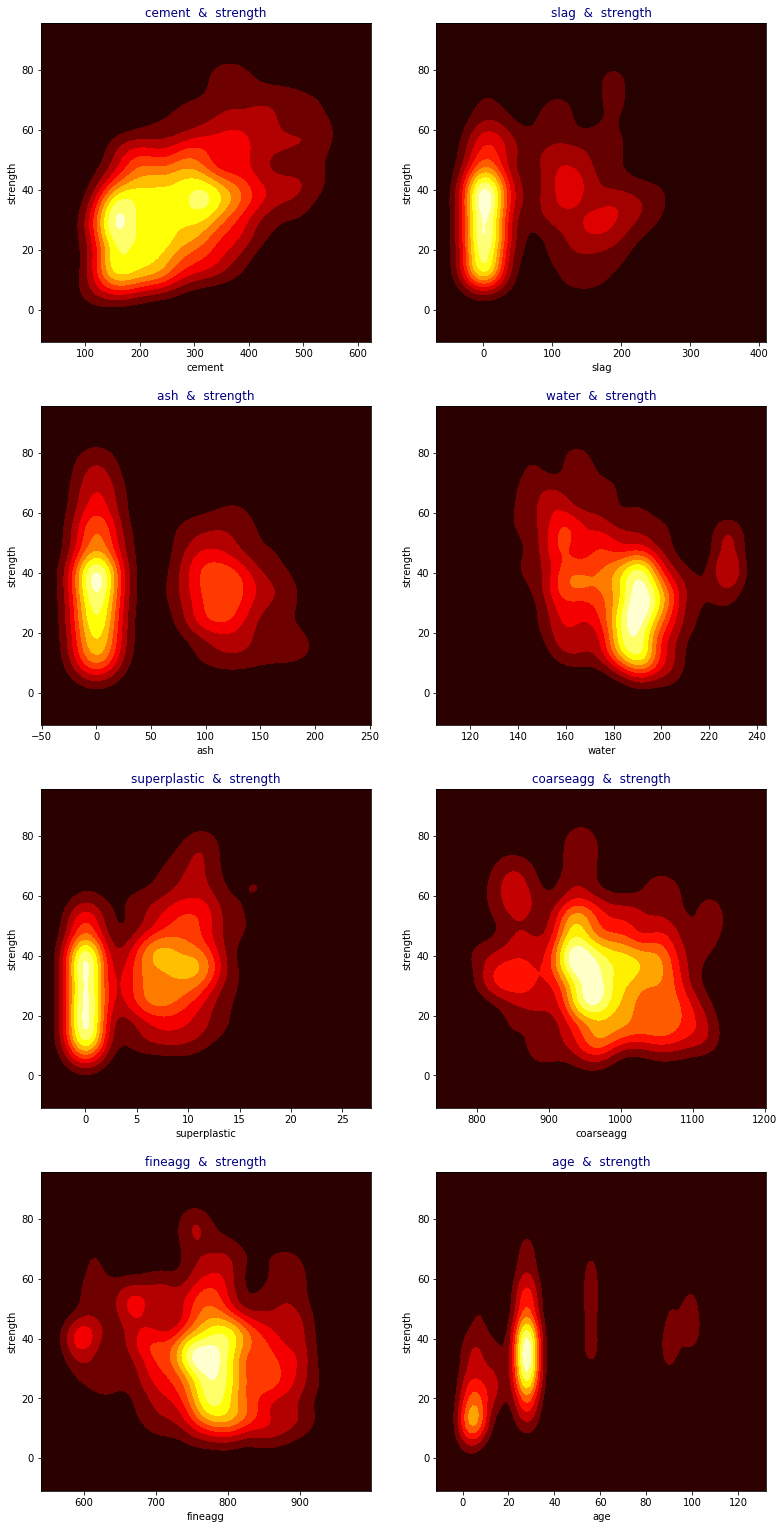

In [22]:
cols = [i for i in master.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(master[i],
                master["strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  strength",color="navy")

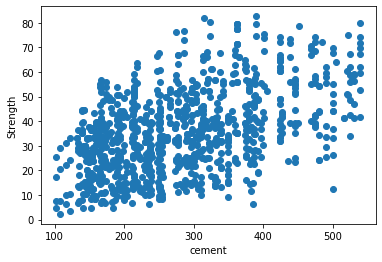

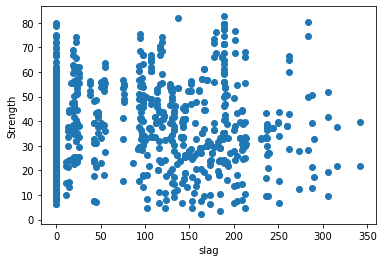

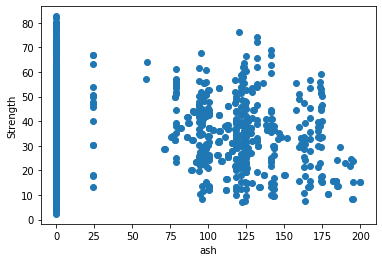

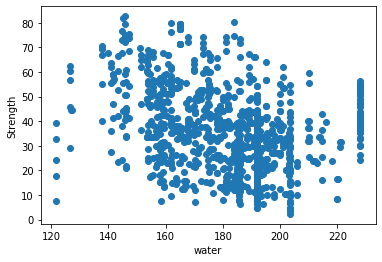

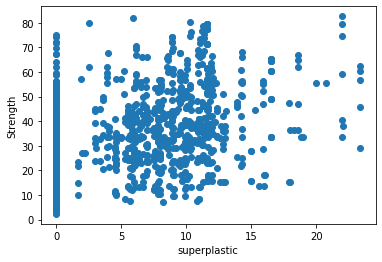

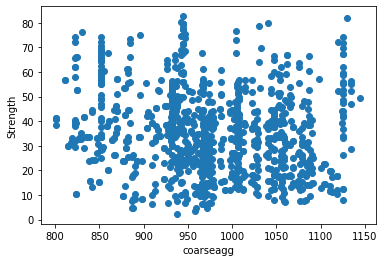

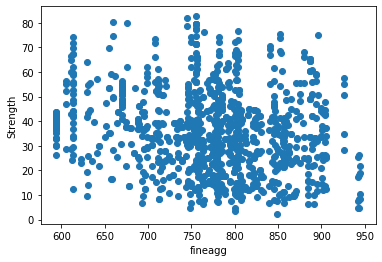

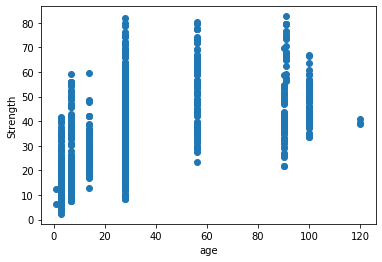

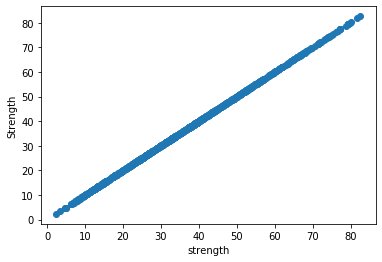

In [23]:
#scatterplot analysis
for i in range(len(master.columns)):
    plt.scatter(master.iloc[:,i],master.iloc[:,8])
    plt.xlabel(master.columns[i])
    plt.ylabel("Strength")
    plt.show()



- Strength increases with amount of cement.
- Strength increases with age.
- Cement with low age requires more cement for higher strength.
- The older the cement is the more water it requires.
- Concrete strength increases when less water is used in preparing it.
- We can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them. So, we will not use Linear model

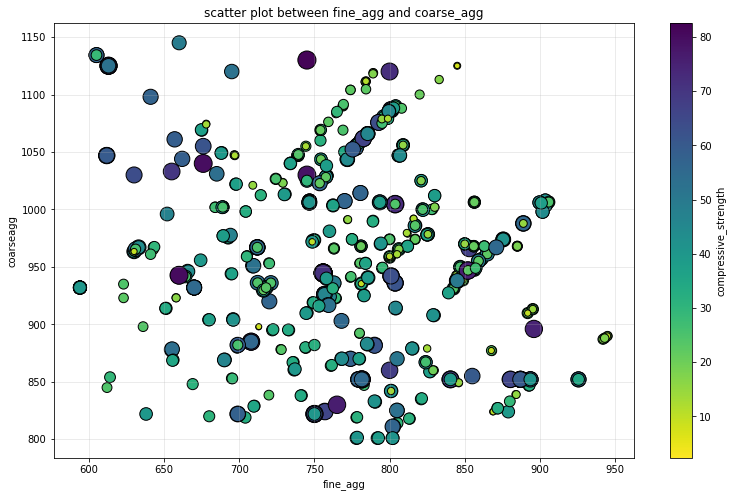

In [24]:
# fine_agg vs coarse_agg

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(master["fineagg"],master["coarseagg"],
            c=master["strength"],s=master["strength"]*4,
            linewidth=1,edgecolor="k",cmap="viridis_r")
ax.set_facecolor("w")
ax.set_xlabel("fine_agg")
ax.set_ylabel("coarseagg")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between fine_agg and coarse_agg")
plt.grid(True,alpha=.3)
plt.show()

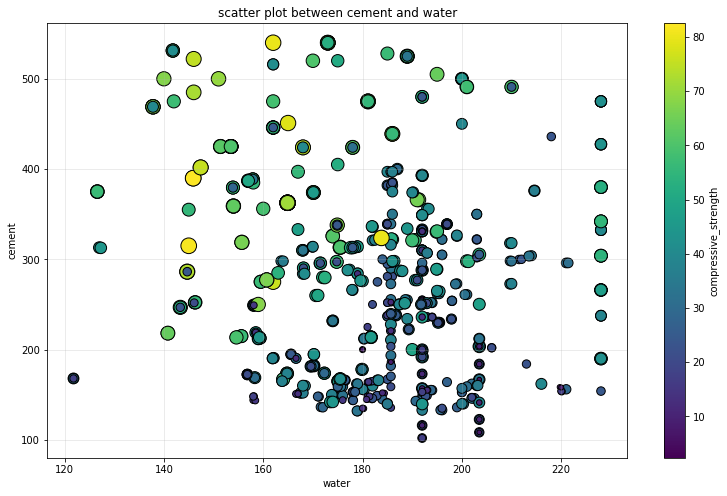

In [25]:
# water vs cement
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(master["water"],master["cement"],
            c=master["strength"],s=master["strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

- As we know the perfect ratio of water & cement gives concrete the desired strength.
- Lets try to take a ratio of cement & water to make new feature.

### 1.3 Feature Engineering


In [26]:
# Feature Engineering
master['water_cement'] = master['cement']/master['water']
master.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement
cement,1.000000,-0.275046,-0.397467,-0.073985,0.012407,-0.109349,-0.238710,-0.031962,0.497832,0.941063
slag,-0.275046,1.000000,-0.320468,0.102258,0.061272,-0.283882,-0.282386,-0.028971,0.137800,-0.246515
ash,-0.397467,-0.320468,1.000000,-0.268143,0.447878,-0.009961,0.091740,0.057928,-0.105755,-0.306217
water,-0.073985,0.102258,-0.268143,1.000000,-0.643483,-0.169951,-0.419259,-0.043683,-0.291635,-0.384010
superplastic,0.012407,0.061272,0.447878,-0.643483,1.000000,-0.223819,0.156023,0.061938,0.345720,0.225060
coarseagg,-0.109349,-0.283882,-0.009961,-0.169951,-0.223819,1.000000,-0.161358,0.018078,-0.164935,-0.090810
fineagg,-0.238710,-0.282386,0.091740,-0.419259,0.156023,-0.161358,1.000000,0.051530,-0.182197,-0.077819
age,-0.031962,-0.028971,0.057928,-0.043683,0.061938,0.018078,0.051530,1.000000,0.499850,-0.016546
strength,0.497832,0.137800,-0.105755,-0.291635,0.345720,-0.164935,-0.182197,0.499850,1.000000,0.559860
water_cement,0.941063,-0.246515,-0.306217,-0.384010,0.225060,-0.090810,-0.077819,-0.016546,0.559860,1.000000


- From above chart, new created feature water_cement is showing a good correlation with dependent variable.
- Also as superplastic is highly correlated with another independent variable i.e water.
- lets drop water & cement from the dataset

In [27]:
master = master.drop(['cement','water'],axis=1)
master.head()

,slag,ash,superplastic,coarseagg,fineagg,age,strength,water_cement
0,212.0,0.0,0.0,971.8,748.5,28.0,29.89,0.694349
1,42.2,124.3,10.8,1080.8,796.2,14.0,23.51,1.066961
2,0.0,95.7,5.5,956.9,861.2,28.0,29.22,1.334045
3,114.0,0.0,0.0,932.0,670.0,28.0,45.85,1.166667
4,183.4,0.0,9.1,1047.4,696.7,28.0,18.29,0.800828


In [28]:
#Splitting the dataset in X & y

X = master.drop(['strength'],axis=1)
y = master['strength']

In [29]:
# Splitting the dataset into training & testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=400)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((721, 7), (309, 7), (721,), (309,))

## Deliverable – 2 (Creating the model and tuning it)

###  Decision Tree Regressor

In [30]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
## Calculating feature importance
feature_cols = X_train.columns

feat_importance = dt_model.feature_importances_


feat_imp_dict = dict(zip(feature_cols, dt_model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
water_cement,0.393157
age,0.367160
slag,0.087207
superplastic,0.059710
fineagg,0.045172
coarseagg,0.032429
ash,0.015165


- So, water_cement and age are significant attributes.
- Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also

In [32]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9911401031144309
Performance on testing data using DT: 0.8247200572813351
Accuracy DT:  0.8247200572813352


- There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.

In [33]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'Test accuracy': acc_DT},index={'1'})
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.82472


In [34]:
# Kfold Cross Validation for Decision Tree

num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8588790110772746
Standard Deviation:  0.08564910761152908


In [35]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'Test accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.824720
2,Decision Tree k fold,0.858879


In [36]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [37]:
## Calculating feature importance
feature_cols = X_train.columns

feat_importance = reg_dt_model.feature_importances_


feat_imp_dict = dict(zip(feature_cols, reg_dt_model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
age,0.458124
water_cement,0.455093
slag,0.064670
fineagg,0.011064
coarseagg,0.006960
ash,0.004089
superplastic,0.000000


In [38]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7362803588104947
Performance on testing data using DT: 0.7247239060451487
Accuracy DT:  0.7247239060451487
MSE:  82.5942317684285


In [39]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'Test accuracy': [acc_RDT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.824720
2,Decision Tree k fold,0.858879
3,Pruned Decision Tree,0.724724


In [40]:
# Kfold Cross Validation for Decision Tree

num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6463238432651341
Standard Deviation:  0.1393047465105557


In [41]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'Test accuracy': [accuracy]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.824720
2,Decision Tree k fold,0.858879
3,Pruned Decision Tree,0.724724
4,Pruned Decision Tree k fold,0.646324


In [42]:
# Using Grid Search CV 

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(10, 100, 10),
    'min_samples_split': range(10, 100, 10)
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeRegressor()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    4.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(10, 100, 10),
                         'min_sampl

In [43]:
# cv results
cv_results = pd.DataFrame(grid_search_dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004190,1.465093e-03,0.001643,5.341889e-04,5,10,10,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.743981,0.796780,0.704247,0.747174,0.721128,0.742662,0.031274,6
1,0.004264,1.047216e-03,0.001920,8.181019e-04,5,10,20,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.743981,0.796780,0.704247,0.747174,0.721128,0.742662,0.031274,6
2,0.005646,1.298391e-03,0.003692,1.761454e-03,5,10,30,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.756890,0.781271,0.698024,0.743061,0.709109,0.737671,0.030617,12
3,0.005472,1.112416e-03,0.002990,6.257159e-04,5,10,40,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.755900,0.767100,0.675688,0.736904,0.706221,0.728363,0.033457,15
4,0.003988,1.094420e-03,0.002229,1.218555e-03,5,10,50,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.738002,0.735626,0.675688,0.694167,0.709412,0.710579,0.023948,21
5,0.004323,1.484854e-03,0.001919,6.483324e-04,5,10,60,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.732040,0.739834,0.675688,0.679017,0.685303,0.702376,0.027686,30
6,0.003789,9.770890e-04,0.002191,8.832492e-04,5,10,70,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.720939,0.732668,0.669199,0.679017,0.601262,0.680617,0.046401,45
7,0.004512,2.105323e-03,0.002194,1.163088e-03,5,10,80,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.721760,0.732668,0.644010,0.673725,0.601262,0.674685,0.048808,48
8,0.005582,1.855467e-03,0.003414,9.824655e-04,5,10,90,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.721760,0.706885,0.607408,0.663172,0.558729,0.651591,0.061141,70
9,0.005398,5.097119e-04,0.002380,4.711946e-04,5,20,10,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.751517,0.769699,0.672068,0.692836,0.688370,0.714898,0.038390,17


In [44]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search_dt.best_score_)
print(grid_search_dt.best_estimator_)

best accuracy 0.7878477533497624
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


**Running the model with best parameters obtained from grid search.**

In [45]:
# model with optimal hyperparameters
grid_search_dt_best_param = DecisionTreeRegressor(criterion = "mse", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=10,
                                  min_samples_split=20)
grid_search_dt_best_param.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [46]:
y_pred = grid_search_dt_best_param.predict(X_test)
# performance on train data
print('Performance on training data using DT:',grid_search_dt_best_param.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',grid_search_dt_best_param.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.8794837431986409
Performance on testing data using DT: 0.8521968216231361
Accuracy DT:  0.8521968216231361
MSE:  44.347076404576136


In [47]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree Grid Search CV'], 'Test accuracy': [acc_RDT]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.824720
2,Decision Tree k fold,0.858879
3,Pruned Decision Tree,0.724724
4,Pruned Decision Tree k fold,0.646324
5,Decision Tree Grid Search CV,0.852197


####  Decision Tree Gird Search CV permforms the best as model donot overfit.

###  Random Forest

In [48]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy RF: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9796905529712153
Performance on testing data using RFR: 0.9028364912007141
Accuracy RF:  0.9028364912007141
MSE:  29.153077733361712


- This model is also overfitting.

In [50]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'Test accuracy': [acc_RFR]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.824720
2,Decision Tree k fold,0.858879
3,Pruned Decision Tree,0.724724
4,Pruned Decision Tree k fold,0.646324
5,Decision Tree Grid Search CV,0.852197
6,Random Forest Regressor,0.902836


In [51]:
# Kfold Cross Validation for Random Forest

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9086445621058417
Standard Deviation:  0.048775989991199066


In [52]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'Test accuracy': [accuracy]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.824720
2,Decision Tree k fold,0.858879
3,Pruned Decision Tree,0.724724
4,Pruned Decision Tree k fold,0.646324
5,Decision Tree Grid Search CV,0.852197
6,Random Forest Regressor,0.902836
7,Random Forest Regressor k fold,0.908645


In [53]:
# Using Grid Search CV for Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(10, 100, 10),
    'min_samples_split': range(10, 100, 10),
    'n_estimators': [20,100, 10], 
    'max_features': [4, 8]
}

n_folds = 5

# Instantiate the grid search model
dtree = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4860 out of 4860 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [54]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search_rf.best_score_)
print(grid_search_rf.best_estimator_)

best accuracy 0.8153819595473776
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [55]:
# Running the model with best parameters obtained from grid search.
grid_search_rf_best_param = RandomForestRegressor(criterion = "mse", 
                                  random_state = 100,
                                  max_depth=10,               
                                  min_samples_leaf=10,
                                  min_samples_split=20)
grid_search_rf_best_param.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [56]:
y_pred = grid_search_rf_best_param.predict(X_test)
# performance on train data
print('Performance on training data using DT:',grid_search_rf_best_param.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',grid_search_rf_best_param.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFGS=metrics.r2_score(y_test, y_pred)
print('Accuracy RF: ',acc_RFGS)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.8919136969838329
Performance on testing data using DT: 0.8561907689449191
Accuracy RF:  0.8561907689449191
MSE:  43.14872675485924


In [57]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Grid Search CV'], 'Test accuracy': [acc_RFGS]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.824720
2,Decision Tree k fold,0.858879
3,Pruned Decision Tree,0.724724
4,Pruned Decision Tree k fold,0.646324
5,Decision Tree Grid Search CV,0.852197
6,Random Forest Regressor,0.902836
7,Random Forest Regressor k fold,0.908645
8,Random Forest Grid Search CV,0.856191


### Gradient Boosting Regressor

In [58]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy GBR: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9448316440827409
Performance on testing data using GBR: 0.8883583826324398
Accuracy GBR:  0.8883583826324398
MSE:  33.497110073680524


In [60]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'Test accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.824720
2,Decision Tree k fold,0.858879
3,Pruned Decision Tree,0.724724
4,Pruned Decision Tree k fold,0.646324
5,Decision Tree Grid Search CV,0.852197
6,Random Forest Regressor,0.902836
7,Random Forest Regressor k fold,0.908645
8,Random Forest Grid Search CV,0.856191
9,Gradient Boost Regressor,0.888358


In [61]:
# Kfold Cross Validation for Gradient Boosting Regressor

num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8906578564360674
Standard Deviation:  0.05059511560696347


In [62]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'Test accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.824720
2,Decision Tree k fold,0.858879
3,Pruned Decision Tree,0.724724
4,Pruned Decision Tree k fold,0.646324
5,Decision Tree Grid Search CV,0.852197
6,Random Forest Regressor,0.902836
7,Random Forest Regressor k fold,0.908645
8,Random Forest Grid Search CV,0.856191
9,Gradient Boost Regressor,0.888358
10,Gradient Boost Regressor k fold,0.890658


### Ada Boosting Regressor

In [63]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [64]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy AB: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.7788481903219093
Performance on testing data using GBR: 0.7508884785038634
Accuracy AB:  0.7508884785038634
MSE:  74.74377613775768


In [65]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'Test accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.824720
2,Decision Tree k fold,0.858879
3,Pruned Decision Tree,0.724724
4,Pruned Decision Tree k fold,0.646324
5,Decision Tree Grid Search CV,0.852197
6,Random Forest Regressor,0.902836
7,Random Forest Regressor k fold,0.908645
8,Random Forest Grid Search CV,0.856191
9,Gradient Boost Regressor,0.888358
10,Gradient Boost Regressor k fold,0.890658


In [66]:
# Kfold Cross Validation for Ada Boost Regressor

num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7444196159038635
Standard Deviation:  0.09482329508104832


In [67]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'Test accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Test accuracy']]
results

,Method,Test accuracy
1,Decision Tree,0.824720
2,Decision Tree k fold,0.858879
3,Pruned Decision Tree,0.724724
4,Pruned Decision Tree k fold,0.646324
5,Decision Tree Grid Search CV,0.852197
6,Random Forest Regressor,0.902836
7,Random Forest Regressor k fold,0.908645
8,Random Forest Grid Search CV,0.856191
9,Gradient Boost Regressor,0.888358
10,Gradient Boost Regressor k fold,0.890658


- After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k folds are giving better results as compared to other models.
